In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import mediapipe as mp
import pickle

<h1>Collect Data (optional)</h1>

In [ ]:
output_base_dir = 'dataset'  # Base directory to save images
if not os.path.exists(output_base_dir):
    os.makedirs(output_base_dir)

images_per_folder = 20  # Number of images to capture before creating a new folder
total_images = 100  # Total number of images to capture
image_counter = 0
folder_counter = 0

camera = cv2.VideoCapture(0)  # 0 indicates the default camera

while image_counter < total_images:
    ret, frame = camera.read()
    if not ret:
        break

    # Resize the frame to 256x256 pixels
    resized_frame = cv2.resize(frame, (256, 256))

    # Display the resized frame (optional)
    cv2.imshow('Capture', resized_frame)

    key = cv2.waitKey(1)
    if key == 27:  # Press 'Esc' to exit
        break
    elif key == 32:  # Press 'Space' to capture
        if image_counter % images_per_folder == 0:
            folder_counter += 1
            label = 'xin_chao' if folder_counter == 1 else 'cam_on' if folder_counter == 2 else 'xin_loi' if folder_counter == 3 else 'tam_biet' if folder_counter == 4 else 'hen_gap_lai'
            current_folder = os.path.join(output_base_dir, f'{label}')
            os.makedirs(current_folder, exist_ok=True)

        image_filename = os.path.join(current_folder, f'{label}_{image_counter:04d}.jpg')
        cv2.imwrite(image_filename, resized_frame)
        print(f'Saved: {image_filename}')
        image_counter += 1

camera.release()
cv2.destroyAllWindows()

<h1>Get data</h1>

In [21]:
def image_processed(file_path):
    # reading the static image
    hand_img = cv2.imdecode(np.fromfile(file_path, dtype=np.uint8), cv2.IMREAD_UNCHANGED)

    # Image processing
    # 1. Convert BGR to RGB
    img_rgb = cv2.cvtColor(hand_img, cv2.COLOR_BGR2RGB)

    # accessing MediaPipe solutions
    mp_hands = mp.solutions.hands

    # Initialize Hands
    hands = mp_hands.Hands(static_image_mode=False,
    max_num_hands=2, min_detection_confidence=0.7)

    # Results
    output = hands.process(img_rgb)
    hands.close()

    try:
        data = output.multi_hand_landmarks[0]
        print(data)
        data = str(data)
        data = data.strip().split('\n')
        garbage = ['landmark {', '  visibility: 0.0', '  presence: 0.0', '}']
        without_garbage = []
        
        for i in data:
            if i not in garbage:
                without_garbage.append(i)

        clean = []
        for i in without_garbage:
            i = i.strip()
            clean.append(i[2:])

        for i in range(0, len(clean)):
            clean[i] = float(clean[i])

        return(clean)

    except:
        return(np.zeros([1,63], dtype=int)[0])



In [18]:
import os
def make_csv():
    
    mypath = 'dataset'
    file_name = open('dataset.csv', 'a', encoding='utf-8')

    for each_folder in os.listdir(mypath):
        if '._' in each_folder:
            pass

        else:
            for each_number in os.listdir(os.path.join(mypath, each_folder)):
                if '._' in each_number:
                    pass
                
                else:
                    label = each_folder

                    file_loc = os.path.join(os.path.join(mypath, each_folder), each_number)

                    data = image_processed(file_loc)
                    try:
                        for id,i in enumerate(data):
                            if id == 0:
                                print(i)
                            
                            file_name.write(str(i))
                            file_name.write(',')

                        file_name.write(label)
                        file_name.write('\n')
                    
                    except:
                        file_name.write('0')
                        file_name.write(',')

                        file_name.write('None')
                        file_name.write('\n')
       
    file_name.close()
    print('Data saved.')

In [22]:
make_csv()

0
landmark {
  x: 0.2307060956954956
  y: 0.779909610748291
  z: 3.902861180904438e-07
}
landmark {
  x: 0.19420687854290009
  y: 0.6785464882850647
  z: -0.11470697820186615
}
landmark {
  x: 0.1577577292919159
  y: 0.5966858863830566
  z: -0.2144332379102707
}
landmark {
  x: 0.13961869478225708
  y: 0.5266348719596863
  z: -0.2900264859199524
}
landmark {
  x: 0.09688378125429153
  y: 0.45056694746017456
  z: -0.3643462657928467
}
landmark {
  x: 0.10441168397665024
  y: 0.7523601651191711
  z: -0.33511289954185486
}
landmark {
  x: 0.07987132668495178
  y: 0.729403555393219
  z: -0.4732964336872101
}
landmark {
  x: 0.09736323356628418
  y: 0.6677068471908569
  z: -0.5487914085388184
}
landmark {
  x: 0.12152954190969467
  y: 0.5919785499572754
  z: -0.5991228222846985
}
landmark {
  x: 0.16673681139945984
  y: 0.8068627119064331
  z: -0.3259698450565338
}
landmark {
  x: 0.13794606924057007
  y: 0.822566032409668
  z: -0.4880930483341217
}
landmark {
  x: 0.16064569354057312
  y: 

landmark {
  x: 0.2476712167263031
  y: 0.7028012871742249
  z: 1.2260932180652162e-07
}
landmark {
  x: 0.22943517565727234
  y: 0.6410576105117798
  z: -0.04697299376130104
}
landmark {
  x: 0.2418084293603897
  y: 0.5770422220230103
  z: -0.07525061070919037
}
landmark {
  x: 0.2711276113986969
  y: 0.5251405239105225
  z: -0.09209893643856049
}
landmark {
  x: 0.2955389618873596
  y: 0.4817022383213043
  z: -0.10780885070562363
}
landmark {
  x: 0.24307551980018616
  y: 0.6565484404563904
  z: -0.11456471681594849
}
landmark {
  x: 0.27812182903289795
  y: 0.6090468764305115
  z: -0.15386730432510376
}
landmark {
  x: 0.3010234534740448
  y: 0.5552166104316711
  z: -0.1705423891544342
}
landmark {
  x: 0.31598639488220215
  y: 0.5105299949645996
  z: -0.1794700175523758
}
landmark {
  x: 0.28216683864593506
  y: 0.6873487234115601
  z: -0.1045098528265953
}
landmark {
  x: 0.330255389213562
  y: 0.6334178447723389
  z: -0.14640317857265472
}
landmark {
  x: 0.35906124114990234
  y:

landmark {
  x: 0.2575070858001709
  y: 0.6984109878540039
  z: 1.026999001396689e-07
}
landmark {
  x: 0.2148233950138092
  y: 0.6429951190948486
  z: -0.04262891411781311
}
landmark {
  x: 0.20348083972930908
  y: 0.5689308643341064
  z: -0.06751061975955963
}
landmark {
  x: 0.2110467404127121
  y: 0.50089031457901
  z: -0.08245821297168732
}
landmark {
  x: 0.2055562287569046
  y: 0.445973664522171
  z: -0.09626850485801697
}
landmark {
  x: 0.2673097550868988
  y: 0.6145836114883423
  z: -0.08824697136878967
}
landmark {
  x: 0.28099870681762695
  y: 0.5418431758880615
  z: -0.11885598301887512
}
landmark {
  x: 0.28561925888061523
  y: 0.48402559757232666
  z: -0.13221488893032074
}
landmark {
  x: 0.2896042764186859
  y: 0.43537449836730957
  z: -0.1396806389093399
}
landmark {
  x: 0.31413304805755615
  y: 0.6296824812889099
  z: -0.0793590396642685
}
landmark {
  x: 0.3562014698982239
  y: 0.5569614768028259
  z: -0.1136145368218422
}
landmark {
  x: 0.3695048987865448
  y: 0.

landmark {
  x: 0.6260248422622681
  y: 0.3051467537879944
  z: 2.931115830051567e-07
}
landmark {
  x: 0.558736264705658
  y: 0.3157411217689514
  z: -0.011838214471936226
}
landmark {
  x: 0.49839717149734497
  y: 0.36083266139030457
  z: -0.028296291828155518
}
landmark {
  x: 0.4798748791217804
  y: 0.41617274284362793
  z: -0.040254078805446625
}
landmark {
  x: 0.49913185834884644
  y: 0.4513223171234131
  z: -0.05565206706523895
}
landmark {
  x: 0.5125649571418762
  y: 0.38607504963874817
  z: -0.07139268517494202
}
landmark {
  x: 0.5032142996788025
  y: 0.4988845884799957
  z: -0.09719599038362503
}
landmark {
  x: 0.50087571144104
  y: 0.5616891384124756
  z: -0.10715783387422562
}
landmark {
  x: 0.49753546714782715
  y: 0.6088142395019531
  z: -0.11228413879871368
}
landmark {
  x: 0.5571738481521606
  y: 0.3921954333782196
  z: -0.07839356362819672
}
landmark {
  x: 0.5357754230499268
  y: 0.5145308971405029
  z: -0.10519436001777649
}
landmark {
  x: 0.5285500884056091
 

landmark {
  x: 0.40805691480636597
  y: 0.36377257108688354
  z: 8.043858770179213e-07
}
landmark {
  x: 0.48345333337783813
  y: 0.3131439685821533
  z: -0.0407475084066391
}
landmark {
  x: 0.5476354956626892
  y: 0.32611268758773804
  z: -0.06920770555734634
}
landmark {
  x: 0.6037624478340149
  y: 0.35347190499305725
  z: -0.09058184176683426
}
landmark {
  x: 0.654320240020752
  y: 0.34577834606170654
  z: -0.11259360611438751
}
landmark {
  x: 0.5714712738990784
  y: 0.45820721983909607
  z: -0.058001186698675156
}
landmark {
  x: 0.6145636439323425
  y: 0.5433950424194336
  z: -0.08133051544427872
}
landmark {
  x: 0.6377915143966675
  y: 0.5990409255027771
  z: -0.10065065324306488
}
landmark {
  x: 0.654251217842102
  y: 0.6458626985549927
  z: -0.11394216120243073
}
landmark {
  x: 0.5349959135055542
  y: 0.5017693638801575
  z: -0.05192826688289642
}
landmark {
  x: 0.5843350887298584
  y: 0.5926902294158936
  z: -0.0671544000506401
}
landmark {
  x: 0.6168880462646484
  y

0
landmark {
  x: 0.6370887756347656
  y: 0.3517763614654541
  z: 1.0673649057935108e-06
}
landmark {
  x: 0.5532675981521606
  y: 0.3427659571170807
  z: -0.07755475491285324
}
landmark {
  x: 0.5070092082023621
  y: 0.37180405855178833
  z: -0.125249981880188
}
landmark {
  x: 0.47742214798927307
  y: 0.4096517562866211
  z: -0.15758347511291504
}
landmark {
  x: 0.4507431089878082
  y: 0.41659510135650635
  z: -0.18854497373104095
}
landmark {
  x: 0.5531479120254517
  y: 0.4859652817249298
  z: -0.12503212690353394
}
landmark {
  x: 0.5298099517822266
  y: 0.6063730716705322
  z: -0.16077692806720734
}
landmark {
  x: 0.5224018692970276
  y: 0.6793015599250793
  z: -0.17791059613227844
}
landmark {
  x: 0.5211533308029175
  y: 0.7339656352996826
  z: -0.18654021620750427
}
landmark {
  x: 0.6038151979446411
  y: 0.5034514665603638
  z: -0.09641984850168228
}
landmark {
  x: 0.5795405507087708
  y: 0.6252578496932983
  z: -0.1308617889881134
}
landmark {
  x: 0.5653178095817566
  y:

landmark {
  x: 0.2128802239894867
  y: 0.608709454536438
  z: 7.410483817693603e-07
}
landmark {
  x: 0.283216655254364
  y: 0.6218499541282654
  z: -0.04798278585076332
}
landmark {
  x: 0.3506564199924469
  y: 0.5893596410751343
  z: -0.07094132900238037
}
landmark {
  x: 0.40854835510253906
  y: 0.5571737289428711
  z: -0.08782679587602615
}
landmark {
  x: 0.4600691497325897
  y: 0.5612226724624634
  z: -0.10405168682336807
}
landmark {
  x: 0.347263902425766
  y: 0.4364945590496063
  z: -0.04916004464030266
}
landmark {
  x: 0.40120750665664673
  y: 0.37030571699142456
  z: -0.07451260834932327
}
landmark {
  x: 0.43543457984924316
  y: 0.3228133022785187
  z: -0.09665285050868988
}
landmark {
  x: 0.46280354261398315
  y: 0.280192494392395
  z: -0.11500153690576553
}
landmark {
  x: 0.3043798506259918
  y: 0.39702266454696655
  z: -0.047163430601358414
}
landmark {
  x: 0.3418429493904114
  y: 0.29904162883758545
  z: -0.07133914530277252
}
landmark {
  x: 0.3692733943462372
  y

landmark {
  x: 0.7811476588249207
  y: 0.6272242665290833
  z: 5.280937216411985e-07
}
landmark {
  x: 0.7179122567176819
  y: 0.6554650068283081
  z: -0.04171783849596977
}
landmark {
  x: 0.6633971333503723
  y: 0.6494941115379333
  z: -0.07123484462499619
}
landmark {
  x: 0.6183221340179443
  y: 0.6325660347938538
  z: -0.09593133628368378
}
landmark {
  x: 0.5714234113693237
  y: 0.6210446357727051
  z: -0.12168807536363602
}
landmark {
  x: 0.6544049978256226
  y: 0.5015637874603271
  z: -0.051804739981889725
}
landmark {
  x: 0.6042466163635254
  y: 0.45100125670433044
  z: -0.07817550748586655
}
landmark {
  x: 0.5716219544410706
  y: 0.41431230306625366
  z: -0.10110169649124146
}
landmark {
  x: 0.5475724935531616
  y: 0.3813159465789795
  z: -0.11843812465667725
}
landmark {
  x: 0.6900160312652588
  y: 0.46203532814979553
  z: -0.05080636218190193
}
landmark {
  x: 0.6469801068305969
  y: 0.3828735947608948
  z: -0.07329528033733368
}
landmark {
  x: 0.6189353466033936
  y

landmark {
  x: 0.31600797176361084
  y: 0.39170897006988525
  z: 3.236437464693154e-07
}
landmark {
  x: 0.3730230927467346
  y: 0.4388744831085205
  z: -0.030897613614797592
}
landmark {
  x: 0.4457334280014038
  y: 0.4574143886566162
  z: -0.043708253651857376
}
landmark {
  x: 0.5022207498550415
  y: 0.4473235011100769
  z: -0.054296378046274185
}
landmark {
  x: 0.545667827129364
  y: 0.4493507146835327
  z: -0.06410858780145645
}
landmark {
  x: 0.5013097524642944
  y: 0.3276618719100952
  z: -0.020185181871056557
}
landmark {
  x: 0.5629655122756958
  y: 0.30268949270248413
  z: -0.03521417826414108
}
landmark {
  x: 0.6030565500259399
  y: 0.28817543387413025
  z: -0.048765528947114944
}
landmark {
  x: 0.6360511779785156
  y: 0.27347564697265625
  z: -0.059807948768138885
}
landmark {
  x: 0.4849109649658203
  y: 0.27672699093818665
  z: -0.021110720932483673
}
landmark {
  x: 0.551836371421814
  y: 0.22735938429832458
  z: -0.03376444801688194
}
landmark {
  x: 0.591795027256

landmark {
  x: 0.5935373306274414
  y: 0.5614569187164307
  z: 4.88587090785586e-07
}
landmark {
  x: 0.53700852394104
  y: 0.5552284717559814
  z: -0.022513432428240776
}
landmark {
  x: 0.48233482241630554
  y: 0.5198384523391724
  z: -0.03419956564903259
}
landmark {
  x: 0.4467630982398987
  y: 0.48543334007263184
  z: -0.04446302726864815
}
landmark {
  x: 0.4143379330635071
  y: 0.4606826603412628
  z: -0.05498240515589714
}
landmark {
  x: 0.5036501884460449
  y: 0.40133291482925415
  z: -0.01795324496924877
}
landmark {
  x: 0.4691346287727356
  y: 0.3466356098651886
  z: -0.03347128629684448
}
landmark {
  x: 0.44798097014427185
  y: 0.3113805651664734
  z: -0.048653945326805115
}
landmark {
  x: 0.43202120065689087
  y: 0.280872106552124
  z: -0.060710638761520386
}
landmark {
  x: 0.5393173098564148
  y: 0.38062670826911926
  z: -0.02297820895910263
}
landmark {
  x: 0.5275813937187195
  y: 0.3025204539299011
  z: -0.0356312096118927
}
landmark {
  x: 0.5213696360588074
  y

landmark {
  x: 0.20266269147396088
  y: 0.3780770003795624
  z: 1.7260296658605512e-07
}
landmark {
  x: 0.23681530356407166
  y: 0.4143795967102051
  z: -0.0036562953609973192
}
landmark {
  x: 0.2956239581108093
  y: 0.41125547885894775
  z: -0.0025985632091760635
}
landmark {
  x: 0.3262329697608948
  y: 0.4004601240158081
  z: -0.004817860666662455
}
landmark {
  x: 0.3381044268608093
  y: 0.3865438997745514
  z: -0.008129657246172428
}
landmark {
  x: 0.3688403069972992
  y: 0.3226681053638458
  z: 0.005339993163943291
}
landmark {
  x: 0.42979222536087036
  y: 0.2877691090106964
  z: -0.008566776290535927
}
landmark {
  x: 0.4670661687850952
  y: 0.2568020820617676
  z: -0.023817028850317
}
landmark {
  x: 0.49272671341896057
  y: 0.22680893540382385
  z: -0.034667130559682846
}
landmark {
  x: 0.3630611002445221
  y: 0.3005613684654236
  z: -0.006116904318332672
}
landmark {
  x: 0.43317121267318726
  y: 0.2600020468235016
  z: -0.017169998958706856
}
landmark {
  x: 0.47594815

landmark {
  x: 0.25249218940734863
  y: 0.6961202621459961
  z: 3.0219098334782757e-07
}
landmark {
  x: 0.28236034512519836
  y: 0.6411476135253906
  z: 0.00881871860474348
}
landmark {
  x: 0.33006149530410767
  y: 0.5939772725105286
  z: 0.009612765163183212
}
landmark {
  x: 0.35853803157806396
  y: 0.5559080839157104
  z: 0.005231164395809174
}
landmark {
  x: 0.37008005380630493
  y: 0.52096027135849
  z: 0.00034887506626546383
}
landmark {
  x: 0.3439086377620697
  y: 0.5803715586662292
  z: 0.007623604964464903
}
landmark {
  x: 0.4042664170265198
  y: 0.5288787484169006
  z: -0.010226673446595669
}
landmark {
  x: 0.4480995535850525
  y: 0.4835035800933838
  z: -0.024243632331490517
}
landmark {
  x: 0.4806734025478363
  y: 0.44496119022369385
  z: -0.03332889825105667
}
landmark {
  x: 0.3506632149219513
  y: 0.5871397256851196
  z: -0.00927747506648302
}
landmark {
  x: 0.41229990124702454
  y: 0.5300678014755249
  z: -0.02626742608845234
}
landmark {
  x: 0.458661854267120

landmark {
  x: 0.770720362663269
  y: 0.679297685623169
  z: 1.0267564221067005e-06
}
landmark {
  x: 0.7238238453865051
  y: 0.6838337779045105
  z: -0.034883592277765274
}
landmark {
  x: 0.6732903122901917
  y: 0.6465441584587097
  z: -0.06350127607584
}
landmark {
  x: 0.6467018127441406
  y: 0.6182740330696106
  z: -0.0903698280453682
}
landmark {
  x: 0.6552982926368713
  y: 0.5949916243553162
  z: -0.11870445311069489
}
landmark {
  x: 0.6545443534851074
  y: 0.5126892924308777
  z: -0.05092564970254898
}
landmark {
  x: 0.631432056427002
  y: 0.4196198284626007
  z: -0.08821912854909897
}
landmark {
  x: 0.6209408640861511
  y: 0.35220101475715637
  z: -0.11663955450057983
}
landmark {
  x: 0.6182303428649902
  y: 0.29724836349487305
  z: -0.1355600655078888
}
landmark {
  x: 0.6819261312484741
  y: 0.5008103847503662
  z: -0.058150652796030045
}
landmark {
  x: 0.655198335647583
  y: 0.3949306011199951
  z: -0.09234818071126938
}
landmark {
  x: 0.6411792039871216
  y: 0.3172

0
landmark {
  x: 0.3704954981803894
  y: 0.7085498571395874
  z: 8.12021937690588e-07
}
landmark {
  x: 0.43811866641044617
  y: 0.6949808597564697
  z: -0.014767568558454514
}
landmark {
  x: 0.5165743231773376
  y: 0.7132598757743835
  z: -0.036360081285238266
}
landmark {
  x: 0.5743952989578247
  y: 0.7300415635108948
  z: -0.05453553795814514
}
landmark {
  x: 0.6229461431503296
  y: 0.7200932502746582
  z: -0.07562896609306335
}
landmark {
  x: 0.5161111950874329
  y: 0.7209534049034119
  z: -0.08155923336744308
}
landmark {
  x: 0.5857380628585815
  y: 0.7894880175590515
  z: -0.11906064301729202
}
landmark {
  x: 0.6235438585281372
  y: 0.8406615257263184
  z: -0.1396811306476593
}
landmark {
  x: 0.6523095369338989
  y: 0.8837365508079529
  z: -0.15150538086891174
}
landmark {
  x: 0.4770880937576294
  y: 0.7505106329917908
  z: -0.09332909435033798
}
landmark {
  x: 0.5543034076690674
  y: 0.8323516249656677
  z: -0.12755087018013
}
landmark {
  x: 0.6041339635848999
  y: 0.

landmark {
  x: 0.35275912284851074
  y: 0.6218120455741882
  z: 2.8896042181258963e-07
}
landmark {
  x: 0.416268527507782
  y: 0.6162077784538269
  z: -0.0001124457994592376
}
landmark {
  x: 0.4807136654853821
  y: 0.6360771059989929
  z: -0.008223352022469044
}
landmark {
  x: 0.5284520983695984
  y: 0.6516644954681396
  z: -0.01744210347533226
}
landmark {
  x: 0.5652245283126831
  y: 0.6473886370658875
  z: -0.027597574517130852
}
landmark {
  x: 0.49390679597854614
  y: 0.630519449710846
  z: -0.027576187625527382
}
landmark {
  x: 0.5474658608436584
  y: 0.6796119213104248
  z: -0.04791441187262535
}
landmark {
  x: 0.5766589045524597
  y: 0.7121943235397339
  z: -0.060490261763334274
}
landmark {
  x: 0.6014951467514038
  y: 0.7377920746803284
  z: -0.06863152980804443
}
landmark {
  x: 0.4712575078010559
  y: 0.6500622630119324
  z: -0.040418412536382675
}
landmark {
  x: 0.5308289527893066
  y: 0.7005969285964966
  z: -0.0577806755900383
}
landmark {
  x: 0.5652093291282654


0
landmark {
  x: 0.3251150846481323
  y: 0.5975112915039062
  z: 4.2650589193726773e-07
}
landmark {
  x: 0.3796311616897583
  y: 0.573033332824707
  z: -0.008017240092158318
}
landmark {
  x: 0.4527272582054138
  y: 0.5472468137741089
  z: -0.017587551847100258
}
landmark {
  x: 0.5049640536308289
  y: 0.5173954367637634
  z: -0.0268033966422081
}
landmark {
  x: 0.5346803069114685
  y: 0.4801267683506012
  z: -0.03797338530421257
}
landmark {
  x: 0.44109046459198
  y: 0.5417976975440979
  z: -0.03829393908381462
}
landmark {
  x: 0.5042943954467773
  y: 0.5378528237342834
  z: -0.06716524809598923
}
landmark {
  x: 0.5509798526763916
  y: 0.5260992050170898
  z: -0.08573903143405914
}
landmark {
  x: 0.588799238204956
  y: 0.5143039226531982
  z: -0.09787149727344513
}
landmark {
  x: 0.430173397064209
  y: 0.5565676689147949
  z: -0.049404289573431015
}
landmark {
  x: 0.4988393783569336
  y: 0.5507638454437256
  z: -0.07480383664369583
}
landmark {
  x: 0.5473344326019287
  y: 0.

<h1>Make model and train</h1>

In [23]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.230706,0.779910,3.902861e-07,0.194207,0.678546,-0.114707,0.157758,0.596686,-0.214433,0.139619,...,0.345794,0.793937,-0.411215,0.363549,0.735568,-0.466217,0.367981,0.663468,-0.511058,cam_on
1,0.636306,0.891454,6.717497e-08,0.702939,0.858835,-0.045057,0.761333,0.806311,-0.086557,0.808882,...,0.532515,0.797092,-0.187767,0.543264,0.727724,-0.198672,0.552941,0.668618,-0.210166,cam_on
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,cam_on
3,0.255558,0.765232,2.278543e-07,0.207923,0.687019,-0.083843,0.205394,0.605416,-0.150102,0.224793,...,0.415625,0.691696,-0.259824,0.429084,0.632015,-0.292627,0.436081,0.574410,-0.320355,cam_on
4,0.269094,0.772751,9.022315e-08,0.233067,0.711026,-0.075610,0.203582,0.660665,-0.143903,0.187164,...,0.390249,0.827731,-0.205612,0.420810,0.767134,-0.219231,0.437019,0.718781,-0.222609,cam_on
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,xin_loi
195,0.325115,0.597511,4.265059e-07,0.379631,0.573033,-0.008017,0.452727,0.547247,-0.017588,0.504964,...,0.440434,0.619082,-0.091175,0.466022,0.606150,-0.097160,0.488946,0.594140,-0.099478,xin_loi
196,0.398288,0.596931,-7.051145e-07,0.331147,0.572803,-0.002895,0.274227,0.521862,-0.020489,0.230365,...,0.443659,0.549508,-0.105097,0.423061,0.527485,-0.104326,0.408653,0.494521,-0.107630,xin_loi
197,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,xin_loi


In [24]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.230706,0.779910,3.902861e-07,0.194207,0.678546,-0.114707,0.157758,0.596686,-0.214433,0.139619,...,0.345794,0.793937,-0.411215,0.363549,0.735568,-0.466217,0.367981,0.663468,-0.511058,cam_on
1,0.636306,0.891454,6.717497e-08,0.702939,0.858835,-0.045057,0.761333,0.806311,-0.086557,0.808882,...,0.532515,0.797092,-0.187767,0.543264,0.727724,-0.198672,0.552941,0.668618,-0.210166,cam_on
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,cam_on
3,0.255558,0.765232,2.278543e-07,0.207923,0.687019,-0.083843,0.205394,0.605416,-0.150102,0.224793,...,0.415625,0.691696,-0.259824,0.429084,0.632015,-0.292627,0.436081,0.574410,-0.320355,cam_on
4,0.269094,0.772751,9.022315e-08,0.233067,0.711026,-0.075610,0.203582,0.660665,-0.143903,0.187164,...,0.390249,0.827731,-0.205612,0.420810,0.767134,-0.219231,0.437019,0.718781,-0.222609,cam_on
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,xin_loi
195,0.325115,0.597511,4.265059e-07,0.379631,0.573033,-0.008017,0.452727,0.547247,-0.017588,0.504964,...,0.440434,0.619082,-0.091175,0.466022,0.606150,-0.097160,0.488946,0.594140,-0.099478,xin_loi
196,0.398288,0.596931,-7.051145e-07,0.331147,0.572803,-0.002895,0.274227,0.521862,-0.020489,0.230365,...,0.443659,0.549508,-0.105097,0.423061,0.527485,-0.104326,0.408653,0.494521,-0.107630,xin_loi
197,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,xin_loi


In [25]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (199, 63)
Labels shape = (199,)


In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [27]:
y_pred = svm.predict(x_test)
y_pred

array(['cam_on', 'cam_on', 'xin_chao', 'tam_biet', 'xin_loi',
       'hen_gap_lai', 'tam_biet', 'xin_loi', 'hen_gap_lai', 'tam_biet',
       'hen_gap_lai', 'cam_on', 'tam_biet', 'hen_gap_lai', 'xin_chao',
       'hen_gap_lai', 'xin_chao', 'hen_gap_lai', 'tam_biet', 'tam_biet',
       'hen_gap_lai', 'tam_biet', 'tam_biet', 'tam_biet', 'cam_on',
       'tam_biet', 'hen_gap_lai', 'cam_on', 'hen_gap_lai', 'cam_on',
       'hen_gap_lai', 'xin_chao', 'hen_gap_lai', 'tam_biet', 'tam_biet',
       'xin_loi', 'cam_on', 'tam_biet', 'hen_gap_lai', 'tam_biet'],
      dtype=object)

In [28]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.8000000000000002, 0.8, 0.8)

<AxesSubplot: title={'center': 'Confusion Matrix - American Sign Language'}>

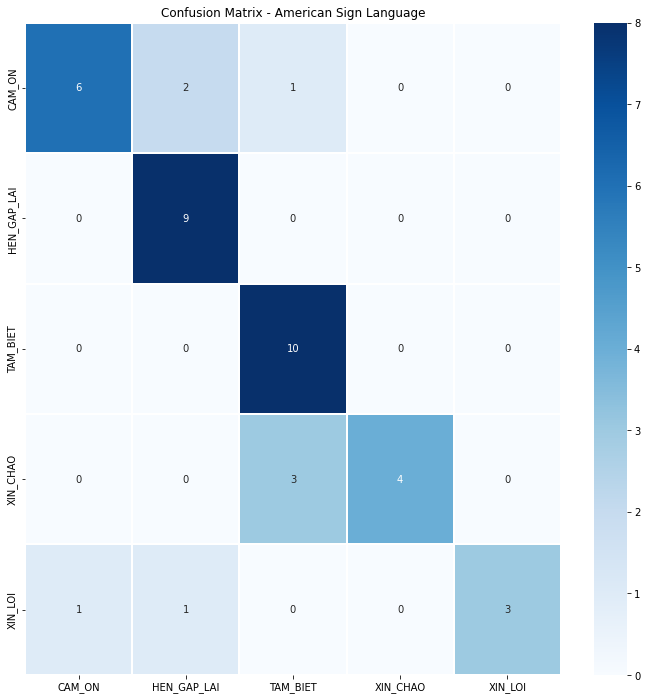

In [29]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [30]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)

<h1>Run test</h1>

In [31]:
def image_processed(hand_img):
    # Image processing
    # 1. Convert BGR to RGB
    img_rgb = cv2.cvtColor(hand_img, cv2.COLOR_BGR2RGB)

    # 2. Flip the img in Y-axis
    #img_flip = cv2.flip(img_rgb, 1)

    # accessing MediaPipe solutions
    mp_hands = mp.solutions.hands

    # Initialize Hands
    hands = mp_hands.Hands(static_image_mode=False,
    max_num_hands=2, min_detection_confidence=0.7)
    mpDraw = mp.solutions.drawing_utils

    # output
    output = hands.process(img_rgb)
    if output.multi_hand_landmarks:
            for hand_landmarks in output.multi_hand_landmarks:
                for point in mp_hands.HandLandmark:
                    x = int(hand_landmarks.landmark[point].x * frame.shape[1])
                    y = int(hand_landmarks.landmark[point].y * frame.shape[0])
                    cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)
                    mpDraw.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    hands.close()

    try:
        data = output.multi_hand_landmarks[0]
        #print(data)
        data = str(data)

        data = data.strip().split('\n')

        garbage = ['landmark {', '  visibility: 0.0', '  presence: 0.0', '}']

        without_garbage = []

        for i in data:
            if i not in garbage:
                without_garbage.append(i)
                        
        clean = []

        for i in without_garbage:
            i = i.strip()
            clean.append(i[2:])

        for i in range(0, len(clean)):
            clean[i] = float(clean[i])
        return(clean)
    except:
        return(np.zeros([1,63], dtype=int)[0])

In [32]:
# load model
with open('model.pkl', 'rb') as f:
    svm = pickle.load(f)


cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
i = 0    
while True:
    
    ret, frame = cap.read()

    frame = cv2.flip(frame,1)
    data = image_processed(frame)
    
    data = np.array(data)
    y_pred = svm.predict(data.reshape(-1,63))
    print(y_pred)

    font = cv2.FONT_HERSHEY_SIMPLEX

    org = (50, 100)
    
    fontScale = 2
    
    color = (0, 0, 255)
    
    thickness = 2
    
    frame = cv2.putText(frame, str(y_pred[0]), org, font, 
                    fontScale, color, thickness, cv2.LINE_AA)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['xin_chao']
['xin_chao']
['tam_biet']
['tam_biet']
['tam_biet']
['tam_biet']
['tam_biet

['xin_loi']
['xin_loi']
['xin_loi']
['xin_loi']
['xin_loi']
['xin_loi']
['xin_loi']
['xin_loi']
['xin_loi']
['xin_loi']
['xin_loi']
['xin_loi']
['xin_loi']
['xin_loi']
['xin_loi']
['xin_loi']
['xin_loi']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['hen_gap_lai']
['tam_biet']
['hen_gap_lai']
['hen_gap_lai']
['xin_chao']
['xin_loi']
['xin_loi']
['xin_loi']
['xin_loi']
['xin_loi']
['xin_loi']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['cam_on']
['xin_loi']
['xin_loi']
['xin_loi']
['tam_biet']
['ta